# Vue 09 Vue with DRF 02

## 인증 with DRF

### 개요

#### 시작하기 전에
- 인증 로직 진행을 위해 User 모델 관련 코드 활성화

- `user ForeignKey` 주석 해제

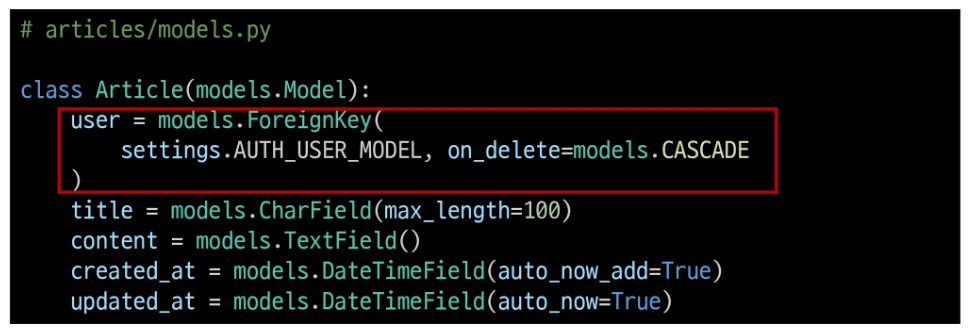

- `serializers`의 `read_only_fields` 주석 해제

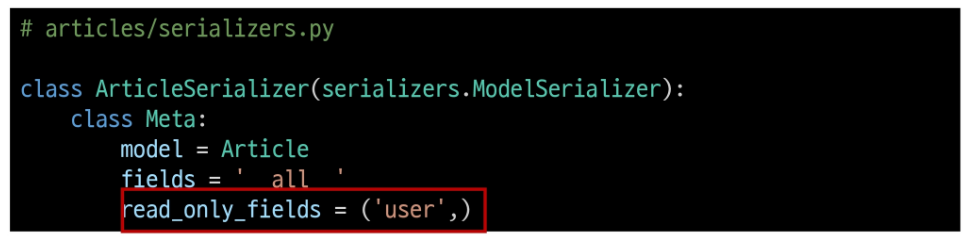

- `article_list` view 함수에서 게시글 생성 시 user 정보도 저장될 수 있도록 주석 해제

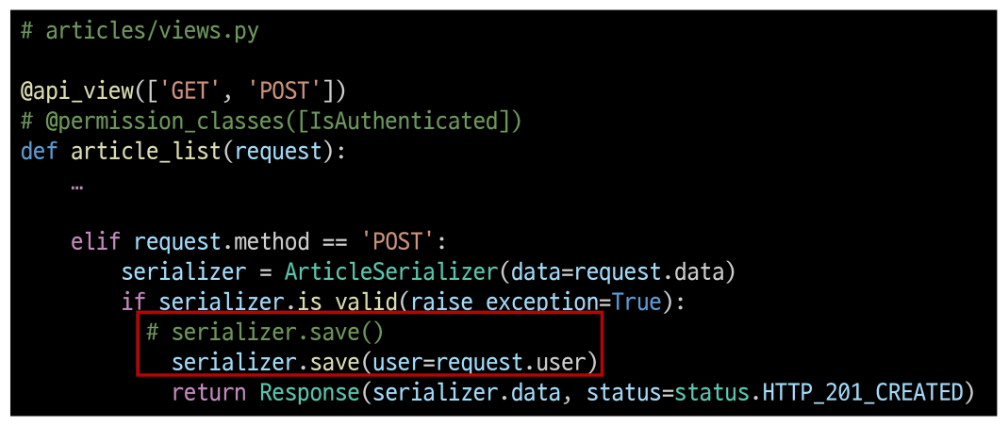

1. DB 초기화 
   - db.sqlite3 삭제 
   - migrations 파일 삭제 

2. Migration 과정 재진행

### 인증

#### Authentication 
##### 인증 
수신된 요청을 해당 요청의 사용자 또는 자격 증명과 연결하는 메커니즘 

- > 누구인지를 확인하는 과정

#### Permissions 
##### 권한 
요청에 대한 접근 허용 또는 거부 여부를 결정

#### 인증과 권한
- 순서상 인증이 먼저 진행되며 수신 요청을 해당 요청의 사용자 또는 해당 요청이 서명된 토큰(token)과 같은 자격 증명 자료와 연결 

- 그런 다음 권한 및 제한 정책은 인증이 완료된 해당 자격 증명을 사용하여 요청을 허용해야 하는 지를 결정

#### DRF 에서의 인증 
- 인증은 항상 view 함수 시작 시, 권한 및 제한 확인이 발생하기 전, 다른 코드의 진행이 허용되기 전에 실행됨 

- `인증 자체로는 들어오는 요청을 허용하거나 거부할 수 없으며, 단순히 요청에 사용된 자격 증명만 식별한다는 점에 유의`
- https://www.django-rest-framework.org/api-guide/authentication/

#### 승인되지 않은 응답 및 금지된 응답 
인증되지 않은 요청이 권한을 거부하는 경우 해당되는 두 가지 오류 코드를 응답 
1. HTTP 401 Unauthorized 
    - 요청된 리소스에 대한 유효한 인증 자격 증명이 없기 때문에 클라이언트 요청이 완료되지 않았음을 나타냄 (누구인지를 증명할 자료가 없음) 

2. HTTP 403 Forbidden (Permission Denied) 
    - 서버에 요청이 전달되었지만, 권한 때문에 거절되었다는 것을 의미 401과 다른 점은 서버는 클라이언트가 누구인지 알고 있음

### 인증 정책 설정

#### 인증 정책 설정 방법 2가지
1. 전역 설정

2. View 함수 별 설정

#### 1. 전역 설정
- 프로젝트 전체에 적용되는 기본 인증 방식을 정의

- DEFAULT_AUTHETICATION_CLASSES를 사용
- 기본 값 : SessionAuthentication과 BasicAuthentication
- 사용 예시

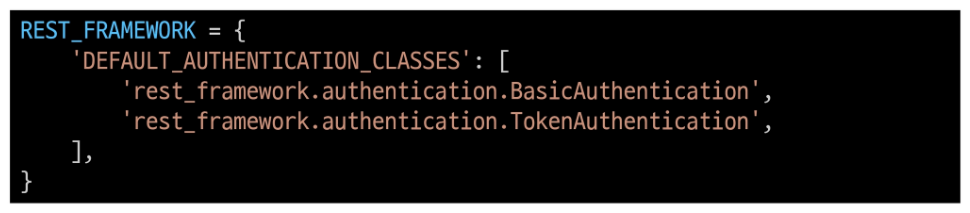

#### 2. View 함수 별 설정
- authentication_classes 데코레이터 사용

- 개별 view에 지정하여 재정의
- 사용 예시

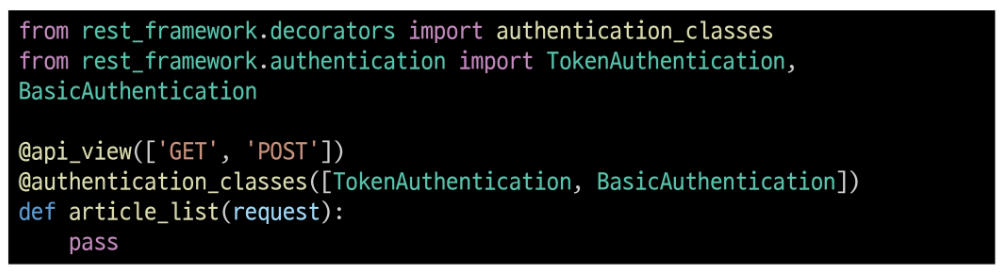

#### DRF가 제공하는 인증 체계
1. BasicAuthentication 

2. TokenAuthentication  **` ✔ `**
3. SessionAuthentication 
4. RemoteUserAuthentication

#### TokenAuthentication 
- token 기반 HTTP 인증 체계

- 기본 데스크톱 및 모바일 클라이언트와 같은 클라이언트-서버 설정에 적합 
- > 서버가 인증된 사용자에게 토큰을 발급하고 사용자는 매 요청마다 발급받은 토큰을 요청과 함께 보내 인증 과정을 거침
- https://www.django-rest-framework.org/api-guide/authentication/#tokenauthentication

### Token 인증 설정

#### TokenAuthentication 적용 과정
1. 인증 클래스 설정 

2. INSTALLED_APPS 추가 
3. Migrate 진행 
4. 토큰 생성 코드 작성

##### 1. 인증 클래스 설정 
- TokenAuthentication 활성화 코드 주석 해제 

- > 전역 인증 정책을 Token 방식으로 설정

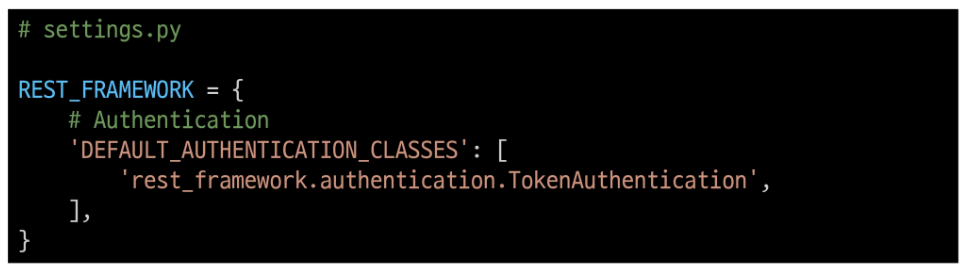

##### 2. INSTALLED_APPS 추가 
rest_framework.authtoken 주석 해제

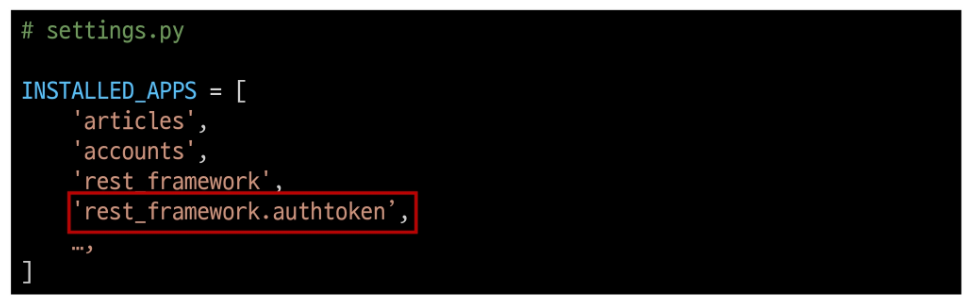

##### 3. Migrate 진행
Migrate

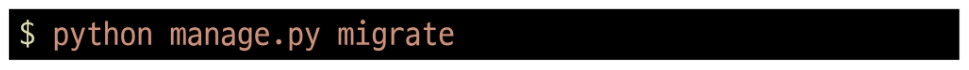

##### 4. 토큰 생성 코드 작성 
- accounts/signals.py 주석 해제 

- 인증된 사용자에게 자동으로 토큰을 생성해주는 역할

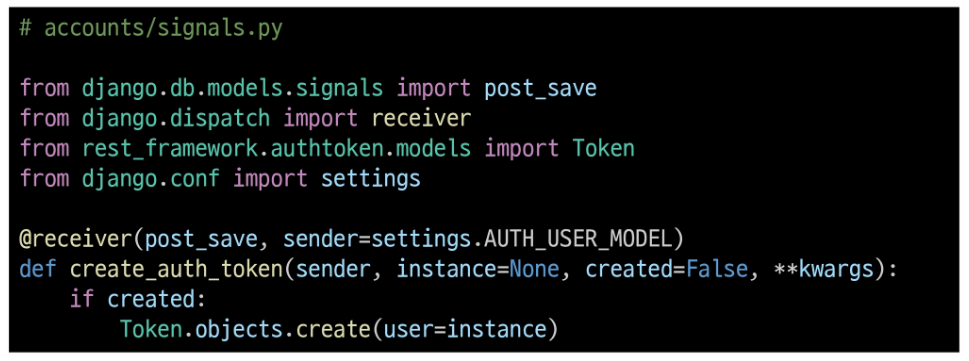

#### 토큰 인증 방식 과정
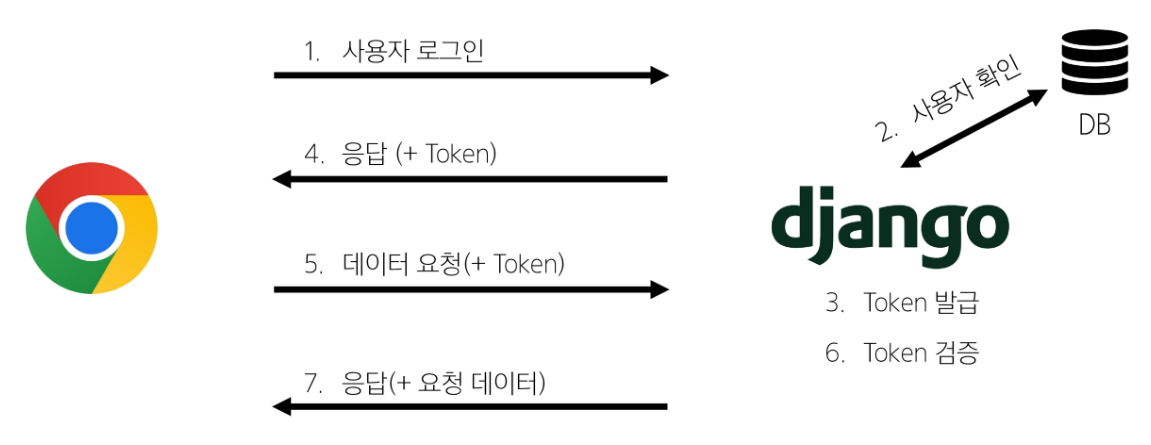

### Dj-Rest-Auth 라이브러리

#### Dj-Rest-Auth
회원가입, 인증(소셜미디어 인증 등), 비밀번호 재설정, 사용자 세부 정보 검색, 회원 정보 수정 등 다양한 인증 관련 기능을 제공하는 라이브러리

- https://github.com/iMerica/dj-rest-auth

#### Dj-Rest-Auth 설치 및 적용
- 설치 (사전에 설치되어 있음)

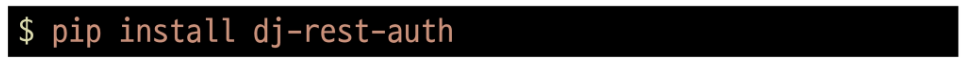

- 추가 App 주석 해제

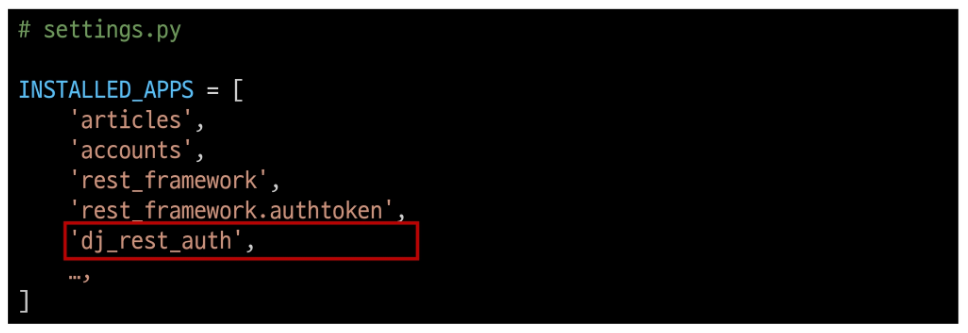

- 추가 URL 주석 해제

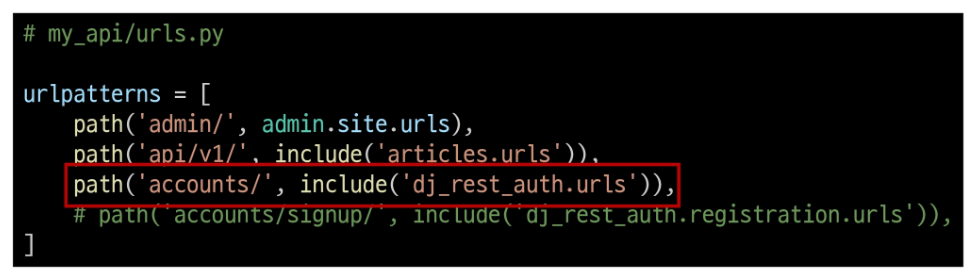

#### Dj-Rest-Auth의 Registration(등록) 기능 추가 설정 
1. 패키지 추가 설치 

2. 추가 App 등록
3. 추가 URL 등록 
4. Migrate 

- https://dj-rest-auth.readthedocs.io/en/latest/installation.html#registration-optional

#### Registration 기능 추가
1. 패키치 추가 설치 (사전에 설치되어 있음)

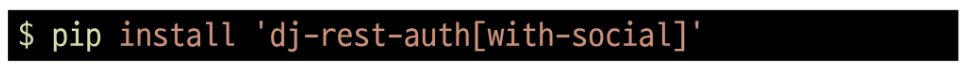

2. 추가 App 주석 해제

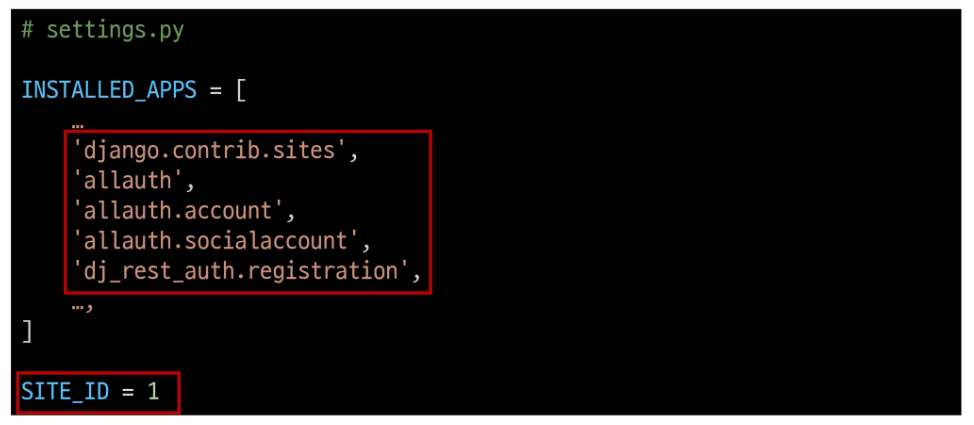

3. 관련 설정 코드 주석 해제

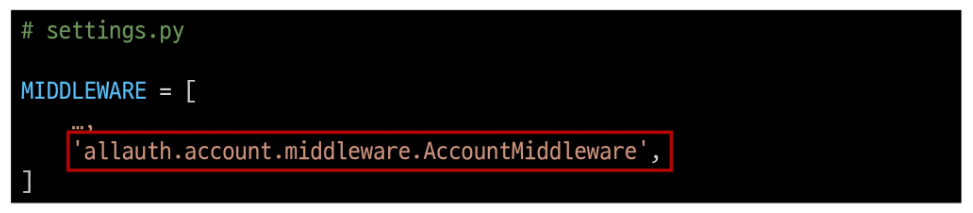

4. 추가 URL 주석 해제

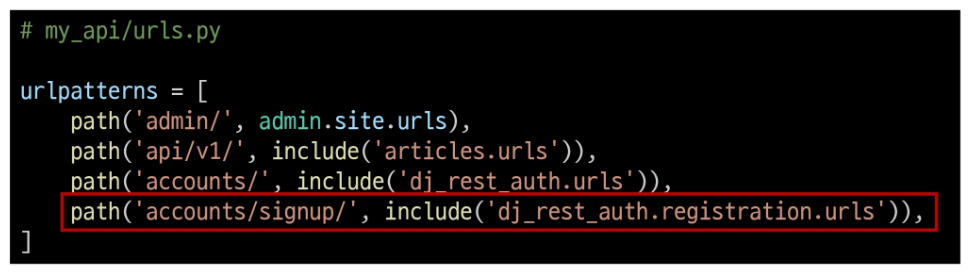

5. Migrate 진행

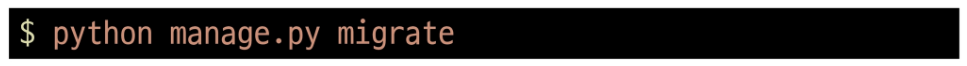

### Token 발급 및 활용

#### Token 발급 
- 회원 가입 및 로그인을 진행하여 토큰 발급 테스트하기

- 라이브러리 설치로 인해 추가 된 URL 목록 확인 
    - http://127.0.0.1:8000/accounts/

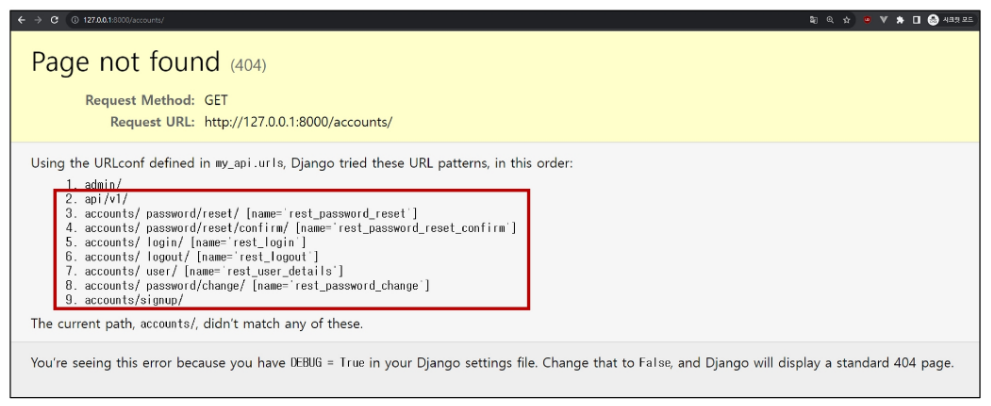

- 회원 가입 진행 (DRF 페이지 하단 회원 가입 form 사용) 
    - http://127.0.0.1:8000/accounts/signup/

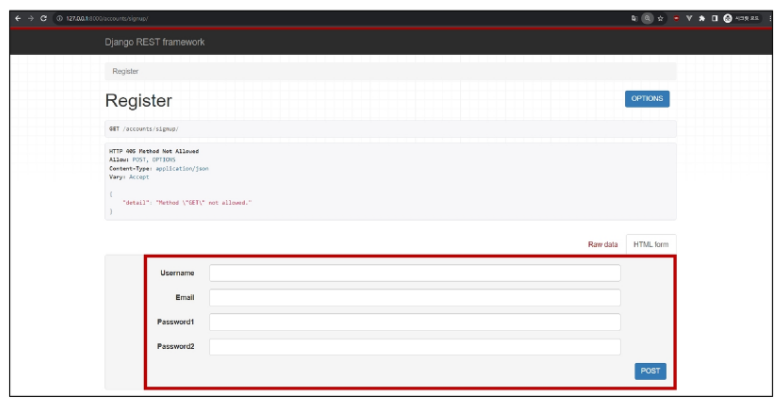

- 로그인 진행 (DRF 페이지 하단 로그인 form 사용) 
    - http://127.0.0.1:8000/accounts/login/

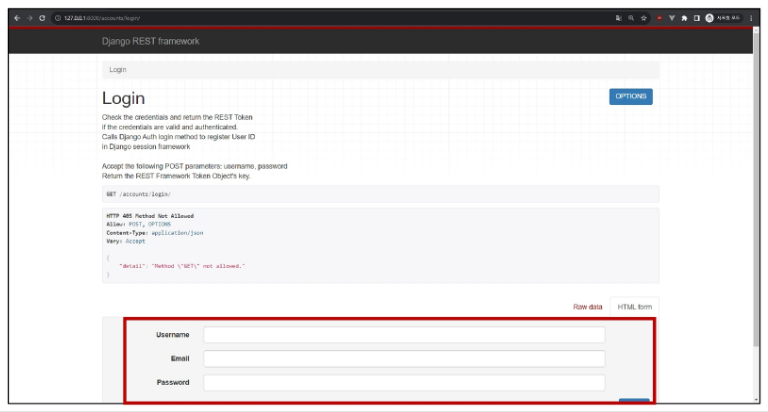

- 로그인 성공 후 DRF로 부터 발급 받은 Token 확인 
    - 이제 이 Token을 Vue에서 별도로 저장하여 매 요청마다 함께 보내야 함

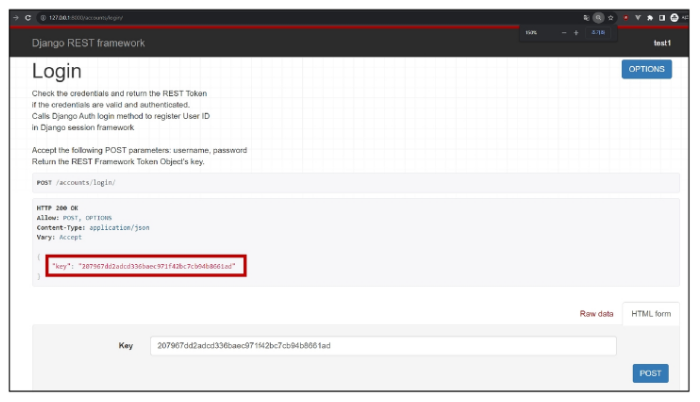

#### Token 활용
- 게시글 작성 과정을 통해 Token 사용 방법 익히기

- Postman을 활용해 게시글 작성 요청 
- http://127.0.0.1:8000/api/v1/articles/
- Body에 게시글 제목과 내용 입력 
- http://127.0.0.1:8000/api/v1/articles/

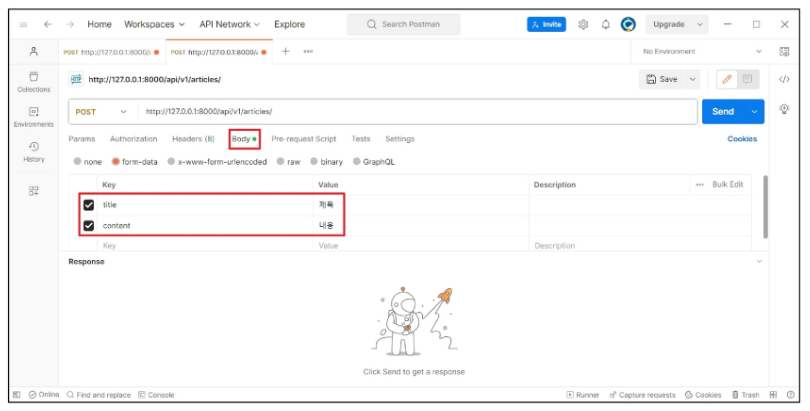
- Headers에 발급받은 Token 작성 후 요청 성공 확인 
    - Key: "Authorization" 
    - Value: "Token 토큰 값"

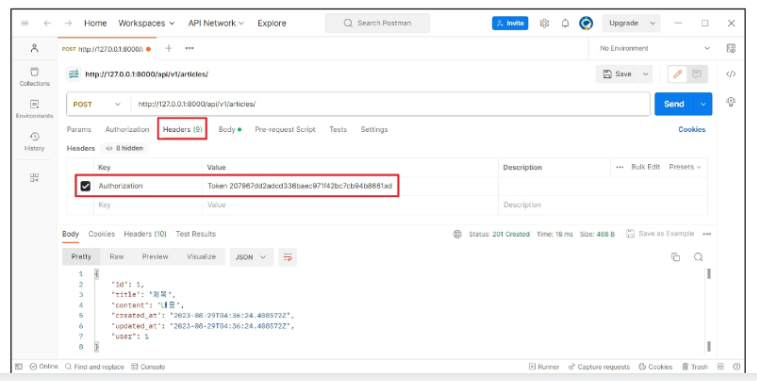

#### 클라이언트가 Token으로 인증 받는 방법 
1. "Authorization" HTTP Header에 포함 

2. 키 앞에는 문자열 "Token”이 와야 하며 "공백”으로 두 문자열을 구분해야 함

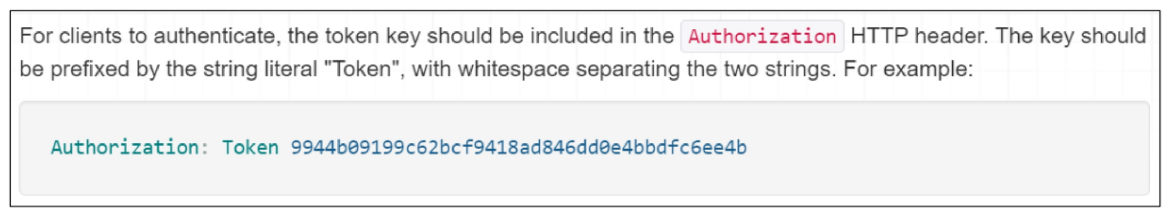

- https://www.django-rest-framework.org/api-guide/authentication/#tokenauthentication

#### Token 데이터 확인 
Django DB 확인

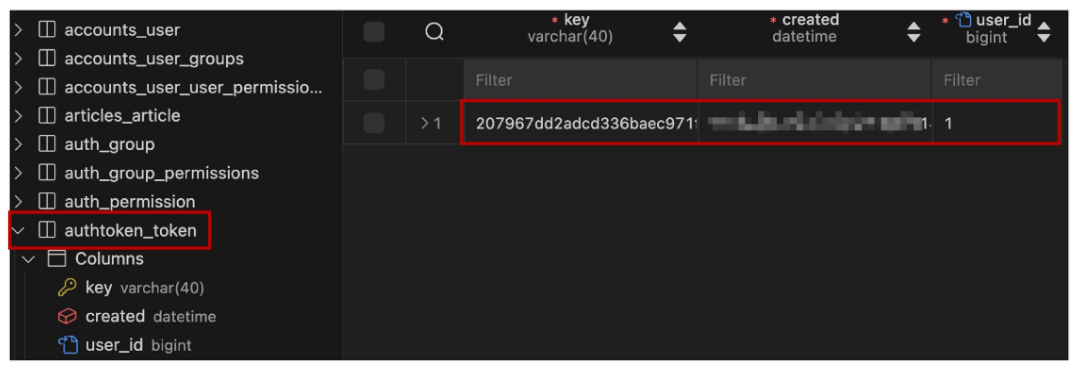

#### 발급 받은 Token을 인증이 필요한 요청마다 함께 보내야 함

## 권한 with DRF

## 인증  with Vue

## 참고